데이터분석및활용 9조 
1912023 이예림
1816105 박은지
1811085 최소원

#**1 데이터 전처리**

##1-1 드라이브 마운트

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##1-2 데이터 압축 풀기

In [ ]:
import json
import os
import pandas as pd
import numpy as np
import base64

#! unzip /content/drive/Shareddrives/데이터분석및활용"(21-2)"/수학분야" "학습자" "역량" "측정" "데이터/Training/성취수준데이터셋_train.zip -d /content/train 
#! unzip /content/drive/Shareddrives/데이터분석및활용"(21-2)"/수학분야" "학습자" "역량" "측정" "데이터/Validation/성취수준데이터셋_valid.zip -d /content/valid


##1-3 문항정오답표, 문항IRT, 응시자IRT dataset 전처리


###1-3-1 JSON Parsing
1) 각각 데이터의 train, valid dataset 합병후 파싱

2) dataframe으로 변환(.csv형식으로 저장)

In [ ]:
# JSON형식을 DataFrame으로 변환하는 함수
def parse_json_to_df(list) -> pd.DataFrame: 
    i = 0
    df_dict = {}
    for d in list:
      df_dict[i] = d;
      i += 1;
    df = pd.DataFrame.from_dict(df_dict, orient="index")
    return df

In [ ]:
# 데이터 프레임 생성작업
correct=[] 
question = []
student = []

name={'1_문항정오답표': correct, '2_문항IRT': question, '3_응시자IRT': student}
name_key_list = list(name.keys())

grades=[7,8,9] # 7학년(중1) ~ 9학년(중3)
folders = ['train', 'valid'] # 기존 데이터 train, valid로 분리되어있음


# 데이터 프레임 생성함수
def make_frame(name_key): 
   for grade in grades:
     contents = []
     for folder in folders:
       file_num = len(os.listdir(f'/content/{folder}/{grade}학년'))
       for i in range(file_num):
         path = f'/content/{folder}/{grade}학년/실력평가{str(i+1).zfill(3)}/{name_key}'
         file_list = os.listdir(path)
         for file in file_list:
           with open(f"{path}/{file}",'r', encoding='utf-8') as json_file:
             json_data = json.load(json_file)
             contents.append(json_data)
     grade_frame = parse_json_to_df(contents)
     name[name_key].append(grade_frame)

In [ ]:
# 문항정오답표, 문항IRT, 응시자IRT 데이터 프레임 만들기
for key in name_key_list:
  make_frame(key) # 함수 호출

In [ ]:
correct[0] # 7학년 문항정오답표

,learnerID,learnerProfile,testID,assessmentItemID,answerCode,Timestamp
0,A070000196,M;S01;7,A070000001,A070001008,1,2020-01-10 21:25:52
1,A070000059,M;S01;7,A070000001,A070001005,0,2020-05-23 08:20:39
2,A070000167,M;S01;7,A070000001,A070001009,0,2020-04-17 16:23:19
3,A070000181,M;S01;7,A070000001,A070001001,1,2020-01-08 18:54:29
4,A070000323,M;S01;7,A070000001,A070001006,0,2020-02-29 02:26:58
...,...,...,...,...,...,...
253589,A070001416,M;S01;7,A070000164,A070164008,1,2020-12-22 01:41:51
253590,A070001482,M;S01;7,A070000164,A070164002,0,2020-12-10 08:05:15
253591,A070001482,M;S01;7,A070000164,A070164004,0,2020-12-10 08:05:20
253592,A070001416,M;S01;7,A070000164,A070164007,1,2020-12-22 01:39:42


In [ ]:
question[0] # 7학년 문항IRT

,testID,assessmentItemID,difficultyLevel,discriminationLevel,guessLevel,knowledgeTag,Timestamp
0,A070000001,A070001009,0.570539,1.676606,0.052382,116,2021-01-08 06:08:25.336946
1,A070000001,A070001006,-0.614573,1.602738,0.131439,608,2021-01-08 06:08:25.336946
2,A070000001,A070001007,-0.998434,2.944685,0.003525,116,2021-01-08 06:08:25.336946
3,A070000001,A070001002,0.581642,1.898853,0.164373,608,2021-01-08 06:08:25.336946
4,A070000001,A070001001,-1.177857,2.155555,0.003693,607,2021-01-08 06:08:25.336946
...,...,...,...,...,...,...,...
2639,A070000164,A070164006,0.148058,5.433770,0.299407,9124,2021-01-08 06:08:25.336946
2640,A070000164,A070164003,-0.730469,1.439203,0.032803,9121,2021-01-08 06:08:25.336946
2641,A070000164,A070164007,0.144939,2.145620,0.009020,9126,2021-01-08 06:08:25.336946
2642,A070000164,A070164001,-1.135194,1.399814,0.017715,7867,2021-01-08 06:08:25.336946


In [ ]:
student[0] # 7학년 응시자IRT

,learnerID,learnerProfile,testID,theta,realScore,Timestamp
0,A070000270,M;S01;7,A070000001,0.849100,0.845404,2021-01-08 06:08:25.336946
1,A070000413,M;S01;7,A070000001,-1.500412,0.204311,2021-01-08 06:08:25.336946
2,A070000035,F;S01;7,A070000001,-0.330297,0.510249,2021-01-08 06:08:25.336946
3,A070000105,M;S01;7,A070000001,0.858736,0.847370,2021-01-08 06:08:25.336946
4,A070000330,M;S01;7,A070000001,-0.647079,0.412061,2021-01-08 06:08:25.336946
...,...,...,...,...,...,...
31409,A070001482,M;S01;7,A070000164,-0.520397,0.314584,2021-01-08 06:08:25.336946
31410,A070001416,M;S01;7,A070000164,1.465458,0.978435,2021-01-08 06:08:25.336946
31411,A070000533,F;S01;7,A070000164,1.465458,0.978435,2021-01-08 06:08:25.336946
31412,A070001502,F;S01;7,A070000164,-0.668272,0.295918,2021-01-08 06:08:25.336946


### 1-3-2 각 학년별 DataFrame 병합

1) 전처리된 데이터프레임 csv형식으로 저장

correct7\~9.csv (중1~중3 문항정오답표)

question7\~9.csv (중1~중3 문항IRT)

student7\~9.csv (중1~중3 응시자IRT)

In [ ]:
# csv형식으로 저장

temp = {'correct': correct, 'question': question, 'student': student}

for name, tmp in temp.items():
  for (num,df) in enumerate(tmp):
    df.to_csv(f'/content/drive/Shareddrives/데이터분석및활용(21-2)/데이터프레임/{name}{num+7}.csv', encoding='euc-kr')


In [ ]:
# 데이터 load (runtime 재시작후 전처리 중복 방지)

correct7 = pd.read_csv(f'/content/drive/Shareddrives/데이터분석및활용(21-2)/데이터프레임/correct7.csv') #중1
correct8 = pd.read_csv(f'/content/drive/Shareddrives/데이터분석및활용(21-2)/데이터프레임/correct8.csv') #중2
correct9 = pd.read_csv(f'/content/drive/Shareddrives/데이터분석및활용(21-2)/데이터프레임/correct9.csv') #중3

question7 = pd.read_csv(f'/content/drive/Shareddrives/데이터분석및활용(21-2)/데이터프레임/question7.csv')
question8 = pd.read_csv(f'/content/drive/Shareddrives/데이터분석및활용(21-2)/데이터프레임/question8.csv')
question9 = pd.read_csv(f'/content/drive/Shareddrives/데이터분석및활용(21-2)/데이터프레임/question9.csv')

student7 = pd.read_csv(f'/content/drive/Shareddrives/데이터분석및활용(21-2)/데이터프레임/student7.csv')
student8 = pd.read_csv(f'/content/drive/Shareddrives/데이터분석및활용(21-2)/데이터프레임/student8.csv')
student9 = pd.read_csv(f'/content/drive/Shareddrives/데이터분석및활용(21-2)/데이터프레임/student9.csv')

##1-4 수학지식체계 dataset 전처리

###1-4-1 데이터 로드 및 탐색
1) 문항IRT knowledgeTag와 지식체계 dataset이 안내자료에 제시된 것과 다름을 확인함

2) 데이터 설명서 p12의 데이터 예시에서 문항 IRT KnowledgeTag 속성값이 "**중등-중1-1학-01-01-02**"으로 기재된 것과는 달리, **116, 608 등 숫자**로 되어있음

3) 수학지식체계 dataset도 설명서 p13에 안내된대로 **KnowledgeTag속성은 존재하지않고**, **선수과목(fromConcept), 후수과목(toConcept)의 pair**들로 이루어져있음을 확인함

4) **선수과목, 후수과목의 id**가 **문항IRT의 knowledgeTag와 연결**된다고 이해함

In [ ]:
# knowledgeTag 속성값이 숫자인 이유가 한글 인코딩 문제가 아닌, 원래 데이터 자체가 숫자였음을 확인 

with open('/content/drive/Shareddrives/데이터분석및활용(21-2)/train/1학년/실력평가001/2_문항IRT/A010000001_A010001001.json', 'r', encoding="UTF-8") as file:
    after = json.load(file)
    print(json.dumps(after,ensure_ascii=False))

{"testID": "A010000001", "assessmentItemID": "A010001001", "difficultyLevel": -3.7197147455, "discriminationLevel": 0.7211787505, "guessLevel": 0.0100890361, "knowledgeTag": "5844", "Timestamp": "2021-01-08 06:08:25.336946"}


In [ ]:
after

{'Timestamp': '2021-01-08 06:08:25.336946',
 'assessmentItemID': 'A010001001',
 'difficultyLevel': -3.7197147455,
 'discriminationLevel': 0.7211787505,
 'guessLevel': 0.0100890361,
 'knowledgeTag': '5844',
 'testID': 'A010000001'}

In [ ]:
question7['knowledgeTag'].unique() # knowledgeTag 전체 속성값 확인 

array([  116,   608,   607,  3821,  3793,  3792,   117,  3794,  3795,
        3820,  3798,  3804,  3806,  4746,  7665,  7667,   121,  5619,
        5783,   163,  5656,  1255,  5780,  5761,  5654,  5781,  5762,
        5782,  5620,   162,  5653,  5655,  8830,  1256,  9161,  5788,
         164,  5705,   169,  5707,  1257,  8831,  5763,  5809,  9162,
        9165,  9164,  9160,  1259,  5810,  5808,  1261,  6785,  6796,
        1260,  9166,  6784,  1262,  6795,  9168,  1263,  9167,  9171,
        9172,  1264,  9170,  9169,  6800,  6802,  1266,  6801,  1267,
        6825,  9185,  9184,  1268,  9186,  6826,  1269,  1271,  6827,
        6828,  9187,  1273,  8872,  8871,  8896,  8868,  8893,  8875,
       10819,  8874,  8885,  8877,  8878,  8880,  8879,  8881,  8890,
        8891,  8889,  8887,  8892,  8901,  7259,  8886,  8894,  8895,
        9021, 10834,  8897,  8899,  9022,  7248,  8900,  8902,  8904,
        8905,  8906,  9592, 10837,  8910,  8908,  8911,  9660,  8913,
       10838,  9052,

In [ ]:
# 지식체계 dataset load
file_path = '/content/drive/Shareddrives/데이터분석및활용(21-2)/수학지식체계 데이터셋/수학 지식체계 데이터 세트_210611.json'

math_knowledge = open(file_path).read() 
math_knowledge = json.loads(math_knowledge) # json 문자열 → 파이썬 객체 변환

In [ ]:
knowledge = list(math_knowledge.values()) 
print(knowledge[0]) # 데이터 확인

{'fromConcept': {'id': 3249, 'name': '거듭제곱', 'semester': '고등-수1-전체', 'description': '임의의 수 $a$와 양의 정수 $n$에 대하여 $a$를 $n$개 거듭하여 곱한 것을 $a$의 $n$제곱이라 하고 $a^n$으로 나타낸다. 또 $a,a^2,a^3,\\cdots,a^n,\\cdots$을 통틀어 $a$의 거듭제곱이라 한다.', 'chapter': {'id': '587', 'name': '지수함수와 로그함수 > 지수 > 거듭제곱과 거듭제곱근'}, 'achievement': {'id': '314', 'name': '거듭제곱과 거듭제곱근의 뜻을 알고, 그 성질을 설명할 수 있다.'}}, 'toConcept': {'id': 1442, 'name': '거듭제곱', 'semester': '중등-중2-1학기', 'description': '같은 수나 문자를 거듭하여 곱한 것을 간단히 나타낸 것', 'chapter': {'id': '481', 'name': '식의 계산 > 단항식의 계산 > 지수법칙'}, 'achievement': {'id': '88', 'name': '지수법칙을 이해한다.'}}}


###1-4-2 JSON Parsing
1) 선수과목과 후수과목을 분리함

2) dataframe으로 변환(.csv형식으로 저장)

In [ ]:
# 지식체계 dataset 파싱 작업
concept_list = [] 
for i in range(len(knowledge)):  # 선수과목 후수과목을 동등한 요소로 분리
  concept_list.append((knowledge[i]['fromConcept']))
  concept_list.append((knowledge[i]['toConcept']))
print(len(concept_list))

6892


In [ ]:
print(concept_list[0]) # 데이터 확인

{'id': 3249, 'name': '거듭제곱', 'semester': '고등-수1-전체', 'description': '임의의 수 $a$와 양의 정수 $n$에 대하여 $a$를 $n$개 거듭하여 곱한 것을 $a$의 $n$제곱이라 하고 $a^n$으로 나타낸다. 또 $a,a^2,a^3,\\cdots,a^n,\\cdots$을 통틀어 $a$의 거듭제곱이라 한다.', 'chapter': {'id': '587', 'name': '지수함수와 로그함수 > 지수 > 거듭제곱과 거듭제곱근'}, 'achievement': {'id': '314', 'name': '거듭제곱과 거듭제곱근의 뜻을 알고, 그 성질을 설명할 수 있다.'}}


In [ ]:
knowledge_df = pd.json_normalize(concept_list) # 데이터 프레임화 시키기
knowledge_df

,id,name,semester,description,chapter.id,chapter.name,achievement.id,achievement.name
0,3249,거듭제곱,고등-수1-전체,임의의 수 $a$와 양의 정수 $n$에 대하여 $a$를 $n$개 거듭하여 곱한 것을...,587,지수함수와 로그함수 > 지수 > 거듭제곱과 거듭제곱근,314,"거듭제곱과 거듭제곱근의 뜻을 알고, 그 성질을 설명할 수 있다."
1,1442,거듭제곱,중등-중2-1학기,같은 수나 문자를 거듭하여 곱한 것을 간단히 나타낸 것,481,식의 계산 > 단항식의 계산 > 지수법칙,88,지수법칙을 이해한다.
2,3,지수가 자연수일 때의 지수법칙,고등-수1-전체,"$a$, $b$가 실수이고 $m$, $n$이 자연수일 때\n\n(1)$a^ma^n=...",587,지수함수와 로그함수 > 지수 > 거듭제곱과 거듭제곱근,314,"거듭제곱과 거듭제곱근의 뜻을 알고, 그 성질을 설명할 수 있다."
3,4659,지수법칙 (2) - 지수의 곱,중등-중2-1학기,"m,n이 자연수일 때\n$(a^m)^n=a^{mn}$",481,식의 계산 > 단항식의 계산 > 지수법칙,88,지수법칙을 이해한다.
4,3,지수가 자연수일 때의 지수법칙,고등-수1-전체,"$a$, $b$가 실수이고 $m$, $n$이 자연수일 때\n\n(1)$a^ma^n=...",587,지수함수와 로그함수 > 지수 > 거듭제곱과 거듭제곱근,314,"거듭제곱과 거듭제곱근의 뜻을 알고, 그 성질을 설명할 수 있다."
...,...,...,...,...,...,...,...,...
6887,11270,천억 단위까지의 수 알아보기,초등-초4-1학기,1억이 7365개인 수\n- 쓰기: 736500000000또는 7365억\n- 읽기...,224,큰 수 > 억과 조를 알아볼까요,11,10000 이상의 큰 수에 대한 자릿값과 위치적 기수법을 원리를 이해한다.
6888,8481,각도의 합과 차,초등-초4-1학기,"각도의 합과 차는 자연수의 덧셈, 뺄셈과 같은 방법으로 계산합니다.",232,각도 > 각도의 합과 차는 얼마일까요,NaN,nan
6889,7310,받아 올림이 세 번 있는 $(세자릿수)+(세자릿수)$,초등-초3-1학기,"1. 각 자리의 숫자를 맞추어 적습니다.\n2. 일의 자리, 십의 자리, 백의 자리...",148,덧셈과 뺄셈 > 덧셈을 해 볼까요 (3),53,받아 올림이 있는 (세 자릿수)+(세 자릿수)의 계산 원리를 이해하고 그 계산을 할...
6890,8247,삼각형을 두 가지 기준으로 분류하기(3),초등-초4-2학기,각의 크기에 따른 분류.\n- 한 각이 직각이면 직각삼각형이다.,268,삼각형 > 삼각형을 두 가지 기준으로 분류해 볼까요,155,여러 가지 모양의 삼각형에 대한 분류 활동을 통하여 직각삼각형을 이해한다.


###1-4-3 DataFrame 정리
중복제거 및 정렬

In [ ]:
knowledge_df = knowledge_df.drop_duplicates() # 모든 열의 내용이 같으면 삭제 (중복제거)
knowledge_df = knowledge_df.sort_values('id', ascending=True) # 정렬
knowledge_df

,id,name,semester,description,chapter.id,chapter.name,achievement.id,achievement.name
2,3,지수가 자연수일 때의 지수법칙,고등-수1-전체,"$a$, $b$가 실수이고 $m$, $n$이 자연수일 때\n\n(1)$a^ma^n=...",587,지수함수와 로그함수 > 지수 > 거듭제곱과 거듭제곱근,314,"거듭제곱과 거듭제곱근의 뜻을 알고, 그 성질을 설명할 수 있다."
8,4,거듭제곱근,고등-수1-전체,방정식 $x^n=a$의 근 $x$를 $a$의 $n$제곱근이라 한다.\n이때 실수 $...,587,지수함수와 로그함수 > 지수 > 거듭제곱과 거듭제곱근,314,"거듭제곱과 거듭제곱근의 뜻을 알고, 그 성질을 설명할 수 있다."
12,10,거듭제곱근의 대소 비교,고등-수1-전체,거듭제곱근의 성질 (6)과 다음 성질을 이용하여 거듭제곱근의 대소를 비교할 수 있다...,587,지수함수와 로그함수 > 지수 > 거듭제곱과 거듭제곱근,314,"거듭제곱과 거듭제곱근의 뜻을 알고, 그 성질을 설명할 수 있다."
29,23,이등변삼각형의 밑각의 성질,중등-중2-2학기,이등변삼각형의 두 밑각의 크기는 같다.,496,도형의 성질 > 삼각형의 성질 > 이등변삼각형의 성질,174,이등변삼각형의 성질을 이해하고 설명할 수 있다.
28,24,이등변삼각형의 꼭지각의 이등분선의 성질,중등-중2-2학기,이등변삼각형의 꼭지각의 이등분선은 밑변을 수직이등분 한다.,496,도형의 성질 > 삼각형의 성질 > 이등변삼각형의 성질,174,이등변삼각형의 성질을 이해하고 설명할 수 있다.
...,...,...,...,...,...,...,...,...
6872,11254,막대그래프를 보고 이야기 만들기,초등-초4-1학기,종서네 모둠 학생들이 지난 일요일에 수학 공부를 한 시간을 조사하여 나타낸 막대그래...,251,막대그래프 > 막대그래프로 이야기를 만들어 볼까요,296,실생활 자료를 수집하여 막대그래프로 나타낼 수 있다.
6878,11265,글을 읽고 꺾은선그래프 그리기,초등-초4-2학기,나는 아이비를 선물 받아 키우게 되어서 아이비의 키가 얼마나 크고 있는지 궁금했다....,288,꺾은선그래프 > 꺾은선그래프는 어디에 쓰일까요,297,연속적인 변량에 대한 자료를 수집하여 꺾은 선그래프로 나타낼 수 있다.
6882,11269,천만 단위까지의 수 알아보기,초등-초4-1학기,"10000이 1365개인 수- 쓰기: 13560000또는 1356만, 읽기: 천삼백...",223,"큰 수 > 십만, 백만, 천만을 알아볼까요",11,10000 이상의 큰 수에 대한 자릿값과 위치적 기수법을 원리를 이해한다.
6884,11270,천억 단위까지의 수 알아보기,초등-초4-1학기,1억이 7365개인 수\n- 쓰기: 736500000000또는 7365억\n- 읽기...,224,큰 수 > 억과 조를 알아볼까요,11,10000 이상의 큰 수에 대한 자릿값과 위치적 기수법을 원리를 이해한다.


#**2 데이터 전처리(2)**

## 2-1 문항별 주요개념 Mapping

###2-1-1 중등 문항 데이터 추출
중등 문항에 등장하는 Knowledge Tag를 추출한 후, 해당 Tag의 개념 데이터만 남긴다.

In [ ]:
# 중등 문항에 등장하는 knowledge Tag만 추출

mid_knowledge_Tag = []
mid_knowledge_Tag += question7['knowledgeTag'].unique().tolist()
mid_knowledge_Tag += question8['knowledgeTag'].unique().tolist()
mid_knowledge_Tag += question9['knowledgeTag'].unique().tolist()
smid = set(mid_knowledge_Tag)
mid_knowledge_Tag = list(smid)

print(mid_knowledge_Tag)

[23, 24, 25, 26, 30, 31, 32, 78, 8289, 4209, 4210, 4211, 116, 117, 121, 4232, 4234, 4236, 4242, 4243, 8343, 162, 163, 164, 169, 2613, 8403, 8404, 8420, 8421, 8422, 8423, 8424, 8425, 8426, 8427, 8428, 8429, 8431, 8432, 8433, 10568, 10569, 10572, 10573, 10590, 10607, 10608, 10610, 10624, 10625, 4498, 4967, 4970, 4972, 4974, 4975, 4976, 4978, 4979, 10741, 4604, 4605, 10759, 10760, 10764, 10766, 10778, 10784, 2598, 2600, 2601, 2602, 2603, 2604, 2605, 10795, 2607, 2608, 4657, 4658, 4659, 4660, 4661, 4662, 4663, 4664, 4665, 2610, 4667, 4668, 4669, 2614, 4671, 4672, 4673, 10819, 4678, 4679, 4680, 4681, 4682, 4683, 4684, 4685, 4686, 4687, 4688, 10834, 2644, 10837, 10838, 2647, 2648, 10841, 8794, 4697, 2652, 4699, 607, 608, 4709, 4723, 4724, 4725, 8830, 8831, 6784, 6785, 4746, 6795, 6796, 6800, 6801, 6802, 2711, 2712, 2714, 2715, 2717, 2718, 2719, 2721, 2723, 8868, 2725, 2726, 8871, 8872, 6825, 6826, 6827, 6828, 8875, 8874, 4783, 4784, 8878, 8877, 8880, 8879, 8885, 8881, 8887, 8886, 4793, 8889,

In [ ]:
# 중등 문항 데이터 셋만 추출하여 mid_knowledge_df에 저장
mid_knowledge_df = knowledge_df[knowledge_df['id'].isin(mid_knowledge_Tag)]
mid_knowledge_df

,id,name,semester,description,chapter.id,chapter.name,achievement.id,achievement.name
29,23,이등변삼각형의 밑각의 성질,중등-중2-2학기,이등변삼각형의 두 밑각의 크기는 같다.,496,도형의 성질 > 삼각형의 성질 > 이등변삼각형의 성질,174,이등변삼각형의 성질을 이해하고 설명할 수 있다.
28,24,이등변삼각형의 꼭지각의 이등분선의 성질,중등-중2-2학기,이등변삼각형의 꼭지각의 이등분선은 밑변을 수직이등분 한다.,496,도형의 성질 > 삼각형의 성질 > 이등변삼각형의 성질,174,이등변삼각형의 성질을 이해하고 설명할 수 있다.
30,26,직각삼각형의 합동 조건,중등-중2-2학기,(1) 빗변의 길이와 한 예각의 크기가 각각 같은 두 직각삼각형은 합동이다. (RH...,497,도형의 성질 > 삼각형의 성질 > 직각삼각형의 합동조건,170,삼각형의 합동 조건을 이해하고 두 삼각형이 합동인지 판별할 수 있다.
1201,30,삼각형의 외접원과 외심,중등-중2-2학기,"삼각형 ABC의 모든 꼭짓점이 원 O 위에 있을 때, 원 O는 삼각형 ABC에 외접...",498,도형의 성질 > 삼각형의 성질 > 삼각형의 외심과 내심,175,삼각형의 외심과 내심의 성질을 이해하고 설명할 수 있다.
34,32,삼각형의 외심의 응용,중등-중2-2학기,"점 O가 삼각형의 외심이고, $\angle OAB=\angle OBA=x\degre...",498,도형의 성질 > 삼각형의 성질 > 삼각형의 외심과 내심,175,삼각형의 외심과 내심의 성질을 이해하고 설명할 수 있다.
...,...,...,...,...,...,...,...,...
6794,10819,선분의 길이,중등-중1-2학기,"두 선분 AB, CD의 길이가 같을 때, 기호로 $\overline{AB}=\ove...",453,"기본도형 > 기본도형 > 점, 선, 면",167,"점, 선, 면, 각을 이해하고, 점, 직선, 평면의 위치 관계를 설명할 수 있다."
4517,10834,점과 평면 사이의 거리,중등-중1-2학기,"평면 P 위에 있지 않은 점 A에서 평면 P에 내린 수선의 발 H까지의 거리, 즉 ...",455,"기본도형 > 기본도형 > 점, 직선, 평면의 위치관계",167,"점, 선, 면, 각을 이해하고, 점, 직선, 평면의 위치 관계를 설명할 수 있다."
6812,10837,삼각형이 하나로 정해지지 않는 경우,중등-중1-2학기,1.세 변의 길이가 주어져도 가장 긴 변의 길이가 나머지 두 변의 길이의 합보다 크...,458,기본도형 > 작도와 합동 > 삼각형의 작도,169,삼각형을 작도할 수 있다.
6814,10838,대응,중등-중1-2학기,"1.합동인 두 도형에서 서로 포개어지는 꼭짓점과 꼭짓점, 변과 변, 각과 각은 서로...",459,기본도형 > 작도와 합동 > 삼각형의 합동,170,삼각형의 합동 조건을 이해하고 두 삼각형이 합동인지 판별할 수 있다.


###2-1-2 소개념과 주요개념 Mapping
소개념과 주요개념을 배열을 이용하여 mapping한 후, 데이터 프레임에 매칭된 주요 개념을 추가한다. 

In [ ]:
# 소개념 열 추가
mid_knowledge_df = mid_knowledge_df.assign(small_concept = lambda x: x['chapter.name'].str.split('>').str[1].str.strip())

# 개념 mapping. 소개념 배열은 2차원 배열로, 각 주요개념과 동일한 index에 해당하는 소개념이 저장되어 있다. 
# print(mid_knowledge_df['small_concept'].unique())
mid_small_concept = [['소인수분해', '정수와유리수', '유리수와 소수', '제곱근과 실수', '근호를 포함한 식의 계산'], 
                     ['다항식의 곱셈','다항식의 인수분해','문자의 사용과 식의 계산', '다항식의 계산', '단항식의 계산'], 
                     ['이차방정식','일차방정식','일차부등식', '연립일차방정식'], ['이차함수와 그래프','좌표평면과 그래프', '일차함수와 그래프', '일차함수와 일차방정식의 관계', '정비례와 반비례'],
                     ['기본도형', '삼각형의 성질','사각형의 성질', '삼각비', '원과 직선', '원주각', '피타고라스 정리', '작도와 합동', '평면도형의 성질', '도형의 닮음', '닮음의 응용'],
                     ['입체도형의 성질'],
                     ['경우의 수', '확률의 계산'],['대푯값과 산포도', '자료의 정리와 해석', '상관관계']]
mid_concept = ['수와 연산', '다항식', '방정식과 부등식', '함수와 그래프', '평면도형', '입체도형', '확률', '통계']


def concept_mapping(x): # 소개념을 입력받아 해당하는 주요개념을 반환하는 함수 
  s_con = x
  if any(s_con in l for l in mid_small_concept):
    for i in range(len(mid_concept)):
      if s_con in mid_small_concept[i]:
        return mid_concept[i]
  else:
    return '미입력'


def concept_id_mapping(x): # 주요개념의 index(고유한 id)를 반환
  for i in range(len(mid_concept)):
    if x == mid_concept[i]:
        return i


# 주요개념 열 추가
mid_knowledge_df = mid_knowledge_df.assign(concept = lambda x: x['small_concept'])
mid_knowledge_df['concept'] = mid_knowledge_df['small_concept'].apply(concept_mapping)

# mapping되지 않은 데이터가 있는지 확인
not_matched = mid_knowledge_df[mid_knowledge_df['concept']=='미입력'] 
# not_matched


# 주요개념의 id 추가 
mid_knowledge_df = mid_knowledge_df.assign(concept_id = lambda x: x['concept'])
mid_knowledge_df['concept_id'] = mid_knowledge_df['concept_id'].apply(concept_id_mapping)


# 개념 id, 주요개념, 주요개념 id만 남기고 간략화
mid_knowledge_df = mid_knowledge_df[['id', 'concept', 'concept_id']]
mid_knowledge_df.drop_duplicates(['id'])
mid_knowledge_df

,id,concept,concept_id
29,23,평면도형,4
28,24,평면도형,4
30,26,평면도형,4
1201,30,평면도형,4
34,32,평면도형,4
...,...,...,...
6794,10819,평면도형,4
4517,10834,평면도형,4
6812,10837,평면도형,4
6814,10838,평면도형,4


###2-1-3 문항 데이터 추가
문항 데이터에 이전 가공한 주요개념 데이터를 연결한다

In [ ]:
# 문항 데이터에 주요개념 데이터를 연결
question7_concept = pd.merge(question7, mid_knowledge_df, left_on='knowledgeTag', right_on='id')
question8_concept = pd.merge(question8, mid_knowledge_df, left_on='knowledgeTag', right_on='id')
question9_concept = pd.merge(question9, mid_knowledge_df, left_on='knowledgeTag', right_on='id')

question7_concept

,Unnamed: 0,testID,assessmentItemID,difficultyLevel,discriminationLevel,guessLevel,knowledgeTag,Timestamp,id,concept,concept_id
0,1,A070000001,A070001008,-0.328800,2.714890,0.065269,116,2021-01-08 06:08:25.336946,116,수와 연산,0
1,2,A070000001,A070001007,-0.998434,2.944685,0.003525,116,2021-01-08 06:08:25.336946,116,수와 연산,0
2,5,A070000001,A070001009,0.570539,1.676606,0.052382,116,2021-01-08 06:08:25.336946,116,수와 연산,0
3,9,A070000002,A070002007,-0.684678,2.281312,0.010723,116,2021-01-08 06:08:25.336946,116,수와 연산,0
4,12,A070000002,A070002008,0.147816,2.912499,0.000005,116,2021-01-08 06:08:25.336946,116,수와 연산,0
...,...,...,...,...,...,...,...,...,...,...,...
2539,2616,A070000161,A070161006,0.858422,2.624210,0.127701,9126,2021-01-08 06:08:25.336946,9126,통계,7
2540,2623,A070000162,A070162005,0.022331,3.976377,0.288654,9126,2021-01-08 06:08:25.336946,9126,통계,7
2541,2626,A070000162,A070162006,0.670332,14.912332,0.127810,9126,2021-01-08 06:08:25.336946,9126,통계,7
2542,2635,A070000163,A070163007,0.488021,1.969207,0.125956,9126,2021-01-08 06:08:25.336946,9126,통계,7


In [ ]:
# 중복 문항 데이터가 있을 경우, 중복 제거
question7_concept = question7_concept.drop_duplicates(['assessmentItemID'])
question8_concept = question8_concept.drop_duplicates(['assessmentItemID'])
question9_concept = question9_concept.drop_duplicates(['assessmentItemID'])

In [ ]:
# 난이도에 따른 문항별 가중치 미리 계산 

def cal_dif(l): # 가중치 계산 함수
  if l < -2.0: 
    return 0.5
  elif l < -0.5:
    return 0.6
  elif l < 0.5:
    return 0.75
  elif l < 2.0:
    return 0.9
  else:
    return 1.0

# 가중치를 계산하여 가중치 열 추가
question7_concept = question7_concept.assign(weight = lambda x: x['difficultyLevel'])
question7_concept['weight'] = question7_concept['weight'].apply(cal_dif)

question8_concept = question8_concept.assign(weight = lambda x: x['difficultyLevel'])
question8_concept['weight'] = question8_concept['weight'].apply(cal_dif)

question9_concept = question9_concept.assign(weight = lambda x: x['difficultyLevel'])
question9_concept['weight'] = question9_concept['weight'].apply(cal_dif)

question7_concept

,Unnamed: 0,testID,assessmentItemID,difficultyLevel,discriminationLevel,guessLevel,knowledgeTag,Timestamp,id,concept,concept_id,weight
0,1,A070000001,A070001008,-0.328800,2.714890,0.065269,116,2021-01-08 06:08:25.336946,116,수와 연산,0,0.75
1,2,A070000001,A070001007,-0.998434,2.944685,0.003525,116,2021-01-08 06:08:25.336946,116,수와 연산,0,0.60
2,5,A070000001,A070001009,0.570539,1.676606,0.052382,116,2021-01-08 06:08:25.336946,116,수와 연산,0,0.90
3,9,A070000002,A070002007,-0.684678,2.281312,0.010723,116,2021-01-08 06:08:25.336946,116,수와 연산,0,0.60
4,12,A070000002,A070002008,0.147816,2.912499,0.000005,116,2021-01-08 06:08:25.336946,116,수와 연산,0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...
2532,1294,A070000161,A070161006,0.858422,2.624210,0.127701,9126,2021-01-08 06:08:25.336946,9126,통계,7,0.90
2533,1301,A070000162,A070162005,0.022331,3.976377,0.288654,9126,2021-01-08 06:08:25.336946,9126,통계,7,0.75
2534,1304,A070000162,A070162006,0.670332,14.912332,0.127810,9126,2021-01-08 06:08:25.336946,9126,통계,7,0.90
2535,1313,A070000163,A070163007,0.488021,1.969207,0.125956,9126,2021-01-08 06:08:25.336946,9126,통계,7,0.75


In [ ]:
# csv 형식으로 저장
question7_concept.to_csv(f'/content/drive/Shareddrives/데이터분석및활용(21-2)/데이터프레임/question7_concept.csv', encoding='euc-kr')
question8_concept.to_csv(f'/content/drive/Shareddrives/데이터분석및활용(21-2)/데이터프레임/question8_concept.csv', encoding='euc-kr')
question9_concept.to_csv(f'/content/drive/Shareddrives/데이터분석및활용(21-2)/데이터프레임/question9_concept.csv', encoding='euc-kr')

In [ ]:
# 문항 - 개념 Mapping 데이터프레임 로드
concept7 = pd.read_csv(f'/content/drive/Shareddrives/데이터분석및활용(21-2)/데이터프레임/question7_concept.csv', encoding='euc-kr')
concept8 = pd.read_csv(f'/content/drive/Shareddrives/데이터분석및활용(21-2)/데이터프레임/question8_concept.csv', encoding='euc-kr')
concept9 = pd.read_csv(f'/content/drive/Shareddrives/데이터분석및활용(21-2)/데이터프레임/question9_concept.csv', encoding='euc-kr')

## 2-2 주요개념 성취율 계산

### 2-2-1 학생별 정오표 분리
하나의 데이터프레임에 저장된 여러 학생의 문제풀이 데이터를, unique한 학생 id로 묶어 각각의 정오표로 분리해준다. 

In [ ]:
def split_student(cr): # 정오표 분리 함수
  cnt = 0
  cr_list = []
  cr_groups = cr.groupby('learnerID')
  for l in cr['learnerID'].unique():
    cr_list.append(cr_groups.get_group(l))
    cnt += 1
  return cr_list

correct7_list = split_student(correct7) # 정오표 데이터프레임이 저장된 리스트
correct7_list[0] 

,Unnamed: 0,learnerID,learnerProfile,testID,assessmentItemID,answerCode,Timestamp
0,0,A070000232,F;S01;7,A070000001,A070001005,1,2020-03-05 03:00:57
134,134,A070000232,F;S01;7,A070000001,A070001001,1,2020-03-05 02:58:51
450,450,A070000232,F;S01;7,A070000001,A070001006,1,2020-03-05 03:01:12
578,578,A070000232,F;S01;7,A070000001,A070001008,1,2020-03-05 03:01:56
602,602,A070000232,F;S01;7,A070000001,A070001002,1,2020-03-05 02:59:16
...,...,...,...,...,...,...,...
202056,202056,A070000232,F;S01;7,A070000155,A070155005,0,2020-11-28 00:38:29
202140,202140,A070000232,F;S01;7,A070000155,A070155002,0,2020-11-28 00:38:21
202321,202321,A070000232,F;S01;7,A070000155,A070155003,0,2020-11-28 00:38:24
202503,202503,A070000232,F;S01;7,A070000155,A070155006,1,2020-11-28 00:38:33


## 2-2-2 성취율 계산
각 문항마다 가중치를 부여하여 계산한 후, 해당하는 주요개념의 성취율에 합산한다. 계산이 완료되면 성취율 데이터프레임에 값을 추가하고, 모든 학생의 계산이 완료되면 만들어진 데이터프레임을 반환한다. 

In [ ]:
def cal_acv(stu, qus): # 성취율 계산 함수
  achievement_df = pd.DataFrame(columns=['learnerID', 'mid1_acv', 'mid2_acv', 'mid3_acv', 'mid4_acv', 'mid5_acv', 'mid6_acv', 'mid7_acv', 'mid8_acv']) # 개념 8개 분류
  mid_acv = [0,0,0,0,0,0,0,0] # 성취율 값
  mid_cnt = [0,0,0,0,0,0,0,0] # 개념 별 문항 수
  mid_sum = [0,0,0,0,0,0,0,0] # 가중치 합

  qus_ass = qus['assessmentItemID']

  for s in stu:
    s_id = s.iloc[0].values[1] # 학생 아이디

    for l in range(len(s)):

      ans = s.iloc[l].values[5] # 정오값
      q = s.iloc[l].values[4] # 문제 id

      if any(qus_ass.isin([q])): # 문항데이터에 해당 문제가 존재한다면
        con = qus.loc[qus_ass== q,'concept_id'].values[0] # 개념 인덱스
        dif = qus.loc[qus_ass== q,'weight'].values[0] # 가중치

        mid_sum[con] += ans*dif # 가중치 계산하여 합산
        mid_cnt[con] += 1
    
    for k in range(len(mid_sum)): # 가중치를 문항 수로 나누어준다
      if(mid_cnt[k] != 0): 
        mid_acv[k] = mid_sum[k] / mid_cnt[k]
        
    achievement_df.loc[len(achievement_df)] = [s_id]+mid_acv # 학생별 행 추가

  return achievement_df

In [ ]:
# 정오표 분리 함수, 성취율 계산 함수를 이용하여 실제로 계산
correct7_list = split_student(correct7)
correct8_list = split_student(correct8)
correct9_list = split_student(correct9)

achievement7_df = cal_acv(correct7_list, concept7)
achievement8_df = cal_acv(correct8_list, concept8)
achievement9_df = cal_acv(correct9_list, concept9)

In [ ]:
achievement8_df

,learnerID,mid1_acv,mid2_acv,mid3_acv,mid4_acv,mid5_acv,mid6_acv,mid7_acv,mid8_acv
0,A080000012,0.292500,0.342453,0.174138,0.194118,0.261151,0,0,0
1,A080000284,0.438750,0.382075,0.226515,0.272619,0.390091,0,0.417857,0
2,A080000038,0.450000,0.419811,0.258000,0.272619,0.390091,0,0.417857,0
3,A080000136,0.472500,0.433019,0.260526,0.261039,0.351537,0,0.417857,0
4,A080000457,0.393000,0.379961,0.229225,0.254795,0.333109,0,0.417857,0
...,...,...,...,...,...,...,...,...,...
1459,A080001564,0.432134,0.406114,0.358543,0.366120,0.405783,0.437288,0.404213,0
1460,A080001563,0.432134,0.406114,0.358543,0.366120,0.405783,0.437288,0.403562,0
1461,A080001724,0.432134,0.406114,0.358543,0.366120,0.405783,0.437288,0.402992,0
1462,A080001658,0.432134,0.406114,0.358543,0.366120,0.405783,0.437288,0.403142,0


In [ ]:
# 성취율 데이터프레임 csv 형식으로 저장
achievement7_df.to_csv(f'/content/drive/Shareddrives/데이터분석및활용(21-2)/데이터프레임/achievement7.csv', encoding='euc-kr')
achievement8_df.to_csv(f'/content/drive/Shareddrives/데이터분석및활용(21-2)/데이터프레임/achievement8.csv', encoding='euc-kr')
achievement9_df.to_csv(f'/content/drive/Shareddrives/데이터분석및활용(21-2)/데이터프레임/achievement9.csv', encoding='euc-kr')

# 군집분석 수행
**1. 전처리**
- 학년별 무의미한 칼럼(핵심개념) 삭제
- 각 칼럼(핵심개념)별로 min-max 정규화
- PCA후 데이터 살펴보기 -> DBSCAN은 부적절하다 판단

**2. 거리기반 군집분석(k-means)**
- 이상치 탐색
  - k-means는 이상치에 민감하지만, 자체적으로 제외 불가능
  - LOF방식을 사용하여 핵심개념별로 상대적 밀집도를 기준으로 이상치 탐색
- (이상치포함) k를 3~5부터 군집분석
- (이상치제외) k를 3~5부터 군집분석

**3. 거리기반 군집분석(k-medoid)**
- (이상치포함) k를 3~5부터 군집분석
- (이상치제외) k를 3~5부터 군집분석

**4.분석결과 시각화**
- PCA로 3차원으로 줄여서 군집결과와 이상치 탐색 여부 시각화

In [ ]:
# 성취율 데이터프레임 불러오기
achievement7 = pd.read_csv(f'/content/drive/Shareddrives/데이터분석및활용(21-2)/데이터프레임/achievement7.csv', encoding='euc-kr', index_col=0)
achievement8 = pd.read_csv(f'/content/drive/Shareddrives/데이터분석및활용(21-2)/데이터프레임/achievement8.csv', encoding='euc-kr', index_col=0)
achievement9 = pd.read_csv(f'/content/drive/Shareddrives/데이터분석및활용(21-2)/데이터프레임/achievement9.csv', encoding='euc-kr', index_col=0)

## 군접분석 전 간단한 EDA

In [ ]:
df_list = [achievement7, achievement8, achievement9]
for df in df_list:
  col_list = df.columns
  col_list = col_list[1:]
  print(df.describe())
  for col in col_list :
    print(col, ":", df[df[col]==0].size)

          mid1_acv     mid2_acv  ...  mid7_acv     mid8_acv
count  1655.000000  1655.000000  ...    1655.0  1655.000000
mean      0.410541     0.385404  ...       0.0     0.408914
std       0.014249     0.015428  ...       0.0     0.023947
min       0.361391     0.373209  ...       0.0     0.187500
25%       0.402300     0.374607  ...       0.0     0.399355
50%       0.402300     0.378721  ...       0.0     0.410516
75%       0.414090     0.393734  ...       0.0     0.418203
max       0.523944     0.516667  ...       0.0     0.492043

[8 rows x 8 columns]
mid1_acv : 0
mid2_acv : 0
mid3_acv : 0
mid4_acv : 0
mid5_acv : 0
mid6_acv : 0
mid7_acv : 14895
mid8_acv : 0
          mid1_acv     mid2_acv  ...     mid7_acv  mid8_acv
count  1464.000000  1464.000000  ...  1464.000000    1464.0
mean      0.429182     0.410580  ...     0.419872       0.0
std       0.008010     0.008608  ...     0.025504       0.0
min       0.292500     0.342453  ...     0.000000       0.0
25%       0.428842     0.40599

학년 별로 특정 개념은 수행하지 않는 것으로보임
- 7학년은 mid7_acv : 14895
- 8학년은 mid8_acv : 13176
- 9학년은 mid6_acv : 5571
- mid7_acv : 5571   

In [ ]:
# 군집분석 전 전처리
# 1) 학년별로 특정개념 칼럼 제거
achievement7 = achievement7.drop(columns='mid7_acv', axis=1)
achievement8 = achievement8.drop(columns='mid8_acv', axis=1)
achievement9 = achievement9.drop(columns=['mid6_acv','mid7_acv'], axis=1)
print(achievement7.columns)
print(achievement8.columns)
print(achievement8.columns)

Index(['learnerID', 'mid1_acv', 'mid2_acv', 'mid3_acv', 'mid4_acv', 'mid5_acv',
       'mid6_acv', 'mid8_acv'],
      dtype='object')
Index(['learnerID', 'mid1_acv', 'mid2_acv', 'mid3_acv', 'mid4_acv', 'mid5_acv',
       'mid6_acv', 'mid7_acv'],
      dtype='object')
Index(['learnerID', 'mid1_acv', 'mid2_acv', 'mid3_acv', 'mid4_acv', 'mid5_acv',
       'mid6_acv', 'mid7_acv'],
      dtype='object')


In [ ]:
# 각 성취율 칼럼에 max값에 차이가 매우큼, 0~1사이로 Min-Max Normalization
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

output = min_max_scaler.fit_transform(achievement7.iloc[:,1:])  # ID는 제외하고 정규화
achievement7_norm = pd.concat([achievement7['learnerID'], pd.DataFrame(output, columns=achievement7.iloc[:,1:].columns, index=list(achievement7.index.values))], axis=1)

output = min_max_scaler.fit_transform(achievement8.iloc[:,1:])  # ID는 제외하고 정규화
achievement8_norm = pd.concat([achievement8['learnerID'], pd.DataFrame(output, columns=achievement8.iloc[:,1:].columns, index=list(achievement8.index.values))], axis=1)

output = min_max_scaler.fit_transform(achievement9.iloc[:,1:])  # ID는 제외하고 정규화
achievement9_norm = pd.concat([achievement9['learnerID'], pd.DataFrame(output, columns=achievement9.iloc[:,1:].columns, index=list(achievement9.index.values))], axis=1)

In [ ]:
# 정규화가 잘 되었음!
print(achievement7_norm.columns)
achievement7_norm.describe()

Index(['learnerID', 'mid1_acv', 'mid2_acv', 'mid3_acv', 'mid4_acv', 'mid5_acv',
       'mid6_acv', 'mid8_acv'],
      dtype='object')


,mid1_acv,mid2_acv,mid3_acv,mid4_acv,mid5_acv,mid6_acv,mid8_acv
count,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000
mean,0.739389,0.689795,0.648766,0.593923,0.577319,0.558895,0.523008
std,0.231847,0.251132,0.264621,0.272866,0.272963,0.269172,0.271867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.690097,0.546632,0.449536,0.357108,0.348991,0.352940,0.315651
50%,0.833845,0.815699,0.797085,0.696034,0.591706,0.561146,0.537568
75%,0.833845,0.815699,0.801096,0.772453,0.838540,0.801971,0.721113
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
achievement7_acv = achievement7[['mid1_acv','mid2_acv','mid3_acv','mid4_acv','mid5_acv','mid6_acv','mid8_acv']]
achievement8_acv = achievement8[['mid1_acv', 'mid2_acv', 'mid3_acv', 'mid4_acv', 'mid5_acv','mid6_acv', 'mid7_acv']]
achievement9_acv = achievement9[[ 'mid1_acv', 'mid2_acv', 'mid3_acv', 'mid4_acv', 'mid5_acv','mid8_acv']]

achievement7_norm = achievement7
achievement8_norm = achievement8
achievement9_norm = achievement9

# PCA(차원축소) 후 데이터 분포를 저차원에 투영시켜 살펴보자 
- 7-8개의 주요개념들을 2-3차원으로 투영시켜 확인한 결과
- 특정 선형 분포가 아니며, 군집을 나눌 수 있는 분포임이 확인되었다.
- 다만 밀도기반 분석을 하기 좋은 분포임은 아닌 것을 발견하였다.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


[0.71715437 0.16686683]


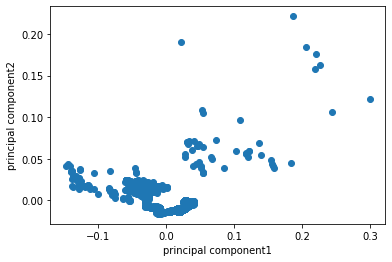

[0.93083204 0.05048418]


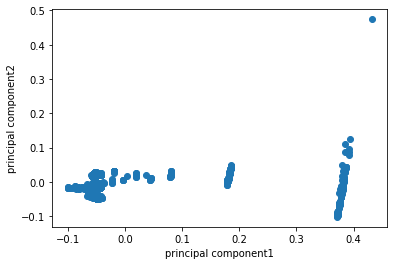

[0.50977206 0.38817406]


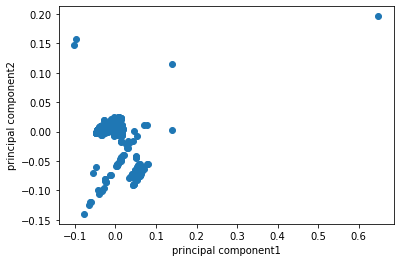

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#achievement7_acv = achievement7_norm[['mid1_acv','mid2_acv','mid3_acv','mid4_acv','mid5_acv','mid6_acv','mid8_acv']]
#achievement8_acv = achievement8_norm[['mid1_acv', 'mid2_acv', 'mid3_acv', 'mid4_acv', 'mid5_acv','mid6_acv', 'mid7_acv']]
#achievement9_acv = achievement9_norm[[ 'mid1_acv', 'mid2_acv', 'mid3_acv', 'mid4_acv', 'mid5_acv','mid8_acv']]

achievement7_acv = achievement7[['mid1_acv','mid2_acv','mid3_acv','mid4_acv','mid5_acv','mid6_acv','mid8_acv']]
achievement8_acv = achievement8[['mid1_acv', 'mid2_acv', 'mid3_acv', 'mid4_acv', 'mid5_acv','mid6_acv', 'mid7_acv']]
achievement9_acv = achievement9[[ 'mid1_acv', 'mid2_acv', 'mid3_acv', 'mid4_acv', 'mid5_acv','mid8_acv']]
df_list2 = [achievement7_acv, achievement8_acv,achievement9_acv]

for df in df_list2 : 
  pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
  printcipalComponents = pca.fit_transform(df)
  principalDf = pd.DataFrame(data=printcipalComponents, columns = ['comp1', 'comp2'])
  print(pca.explained_variance_ratio_)
  plt.scatter(x=principalDf['comp1'], y=principalDf['comp2'])
  plt.xlabel('principal component1')
  plt.ylabel('principal component2')
  plt.show()

[0.71715437 0.16686683 0.06489876]


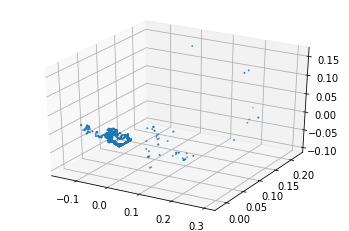

[0.93083204 0.05048418 0.01183467]


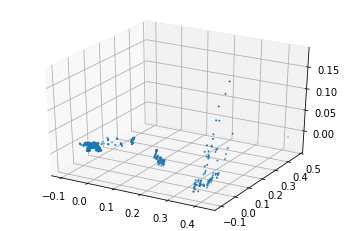

[0.50977206 0.38817406 0.04713361]


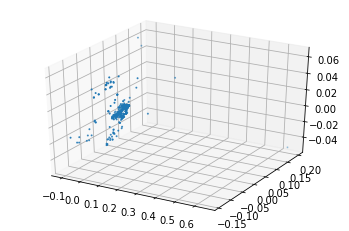

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
df_list2 = [achievement7_acv, achievement8_acv, achievement9_acv]

for df in df_list2 : 
  pca = PCA(n_components=3) # 주성분을 몇개로 할지 결정
  printcipalComponents = pca.fit_transform(df)
  principalDf = pd.DataFrame(data=printcipalComponents, columns = ['comp1', 'comp2','comp3'])
  print(pca.explained_variance_ratio_)
  fig = plt.figure()
  ax = fig.add_subplot(111,projection='3d')
  ax.scatter(principalDf['comp1'], principalDf['comp2'],principalDf['comp3'],marker='o',s=1,cmap='Greens')
  plt.show()

## K-means

### 이상치 탐색
- 본 단계는 실제 서비스에서는 제외될 수 있습니다
- LOF기반
- 1% 미만의 아웃라이어 검출완료, 대부분 상위권 학생만 검출됨


In [ ]:
from sklearn.neighbors import LocalOutlierFactor

# 7학년
clf = LocalOutlierFactor()
outlier_LOF_7= clf.fit_predict(achievement7_acv)

achievement7_norm['outlier'] = outlier_LOF_7 # 1은 정상치, -1은 이상치
achievement7_norm['outlier'] = outlier_LOF_7 # 1은 정상치, -1은 이상치
out_count_7 = len(achievement7_norm[achievement7_norm['outlier']==-1].index)
print('7학년 outlier : {}명, {:.2f}%'.format(out_count_7,out_count_7/len(achievement7_norm)))
achievement7_norm[achievement7_norm['outlier']==-1].describe()

7학년 outlier : 63명, 0.04%


,mid1_acv,mid2_acv,mid3_acv,mid4_acv,mid5_acv,mid6_acv,mid8_acv,outlier
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.0
mean,0.419829,0.401173,0.373468,0.367750,0.417742,0.414344,0.382536,-1.0
std,0.023520,0.031458,0.025498,0.035252,0.017108,0.051168,0.072409,0.0
min,0.361391,0.374607,0.274675,0.265094,0.338068,0.244485,0.187500,-1.0
25%,0.402300,0.376664,0.368199,0.360235,0.412881,0.408655,0.390255,-1.0
50%,0.406040,0.397144,0.380000,0.373745,0.415872,0.424328,0.405688,-1.0
75%,0.437384,0.413790,0.388116,0.381106,0.426396,0.451424,0.418123,-1.0
max,0.523944,0.516667,0.396928,0.525000,0.477670,0.461463,0.443165,-1.0


In [ ]:
# 8학년
clf = LocalOutlierFactor()
outlier_LOF_8= clf.fit_predict(achievement8_acv)

achievement8_norm['outlier'] = outlier_LOF_8 # 1은 정상치, -1은 이상치
out_count_8 = len(achievement8_norm[achievement8_norm['outlier']==-1].index)
print('8학년 outlier : {}명, {:.2f}%'.format(out_count_8,out_count_8/len(achievement8_norm)))
achievement8_norm[achievement8_norm['outlier']==-1].describe()

8학년 outlier : 113명, 0.08%


,mid1_acv,mid2_acv,mid3_acv,mid4_acv,mid5_acv,mid6_acv,mid7_acv,outlier
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.0
mean,0.425763,0.407010,0.347568,0.357621,0.400295,0.370439,0.408834,-1.0
std,0.017830,0.009946,0.031917,0.028460,0.028930,0.136993,0.044479,0.0
min,0.292500,0.342453,0.174138,0.194118,0.261151,0.000000,0.000000,-1.0
25%,0.423416,0.405994,0.355519,0.360080,0.399518,0.412500,0.404047,-1.0
50%,0.428842,0.406114,0.356230,0.363484,0.405776,0.431461,0.412215,-1.0
75%,0.432134,0.408954,0.358543,0.366203,0.416287,0.437288,0.429073,-1.0
max,0.472500,0.433755,0.369625,0.390533,0.430706,0.439655,0.452079,-1.0


In [ ]:
# 9학년
clf = LocalOutlierFactor()
outlier_LOF_9= clf.fit_predict(achievement9_acv)

achievement9_norm['outlier'] = outlier_LOF_9 # 1은 정상치, -1은 이상치
out_count_9 = len(achievement9_norm[achievement9_norm['outlier']==-1].index)
print('9학년 outlier : {}명, {:.2f}%'.format(out_count_9,out_count_9/len(achievement9_norm)))
achievement9_norm[achievement9_norm['outlier']==-1].describe()

9학년 outlier : 45명, 0.07%


,mid1_acv,mid2_acv,mid3_acv,mid4_acv,mid5_acv,mid8_acv,outlier
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.0
mean,0.367475,0.363340,0.354963,0.362932,0.360633,0.358978,-1.0
std,0.039062,0.034215,0.042443,0.028923,0.059981,0.072508,0.0
min,0.144375,0.178448,0.100000,0.222727,0.000000,0.000000,-1.0
25%,0.375729,0.357706,0.358455,0.364145,0.364979,0.334615,-1.0
50%,0.379195,0.360663,0.366879,0.371298,0.370916,0.366327,-1.0
75%,0.381330,0.366322,0.368765,0.376212,0.382751,0.374831,-1.0
max,0.393239,0.426136,0.384305,0.398905,0.395507,0.550000,-1.0


### 이상치 포함) K-means분석

In [ ]:
range_n_clusters = [3, 4, 5]

print("7학년의 K-means 분석결과")
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(achievement7_acv)
    silhouette_avg = silhouette_score(achievement7_acv, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

print("8학년의 K-means 분석결과")
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(achievement8_acv)
    silhouette_avg = silhouette_score(achievement8_acv, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )


print("9학년의 K-means 분석결과")
X = achievement9_norm.iloc[:,1:-1]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(achievement9_acv)
    silhouette_avg = silhouette_score(achievement9_acv, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

7학년의 K-means 분석결과
For n_clusters = 3 The average silhouette_score is : 0.5476729397746533
For n_clusters = 4 The average silhouette_score is : 0.5614819302741383
For n_clusters = 5 The average silhouette_score is : 0.5746539486657485
8학년의 K-means 분석결과
For n_clusters = 3 The average silhouette_score is : 0.8153099702827209
For n_clusters = 4 The average silhouette_score is : 0.5244622742054114
For n_clusters = 5 The average silhouette_score is : 0.5421133986492269
9학년의 K-means 분석결과
For n_clusters = 3 The average silhouette_score is : 0.6650281419417904
For n_clusters = 4 The average silhouette_score is : 0.6704268246212897
For n_clusters = 5 The average silhouette_score is : 0.44905017839273176


In [ ]:
# 분석결과를 바탕으로 각 학년 클러스터링
# 실루엣계수가 가장 높은기준에 따라 7학년 k=5, 8학년 k=3, 9학년 k=4

clusterer = KMeans(n_clusters=5, random_state=10)
cluster_labels = clusterer.fit_predict(achievement7_acv)
achievement7_norm['cluster_kmeans'] =  cluster_labels

clusterer = KMeans(n_clusters=3, random_state=10)
cluster_labels = clusterer.fit_predict(achievement8_acv)
achievement8_norm['cluster_kmeans'] =  cluster_labels

clusterer = KMeans(n_clusters=4, random_state=10)
cluster_labels = clusterer.fit_predict(achievement9_acv)
achievement9_norm['cluster_kmeans'] =  cluster_labels

### 이상치 제외) K-means분석

In [ ]:
range_n_clusters = [3, 4, 5]

print("7학년의 K-means 분석결과(이상치 제외)")
X = achievement7_norm[achievement7_norm['outlier']==1].iloc[:,1:-1]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )


print("8학년의 K-means 분석결과(이상치 제외)")
X = achievement8_norm[achievement8_norm['outlier']==1].iloc[:,1:-1]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )


print("9학년의 K-means 분석결과(이상치 제외)")
X = achievement9_norm[achievement9_norm['outlier']==1].iloc[:,1:-1]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

# 각 실루엣 계수는 이상치 제외 전에 비해 소폭 상승

7학년의 K-means 분석결과(이상치 제외)
For n_clusters = 3 The average silhouette_score is : 0.5499327209434333
For n_clusters = 4 The average silhouette_score is : 0.5783306183191801
For n_clusters = 5 The average silhouette_score is : 0.5046745589993946
8학년의 K-means 분석결과(이상치 제외)
For n_clusters = 3 The average silhouette_score is : 0.8240560561088304
For n_clusters = 4 The average silhouette_score is : 0.5353936912375425
For n_clusters = 5 The average silhouette_score is : 0.5476025064496639
9학년의 K-means 분석결과(이상치 제외)
For n_clusters = 3 The average silhouette_score is : 0.7061051402943723
For n_clusters = 4 The average silhouette_score is : 0.4883021733261966
For n_clusters = 5 The average silhouette_score is : 0.4973638868591719


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 분석결과를 바탕으로 각 학년 클러스터링
# 실루엣계수가 가장 높은기준에 따라 7학년 k=4, 8학년 k=3, 9학년 k=3
achievement7_norm_except = achievement7_norm[achievement7_norm['outlier']==1]
clusterer = KMeans(n_clusters=4, random_state=10)
cluster_labels = clusterer.fit_predict(achievement7_norm_except.iloc[:,1:-1])
achievement7_norm_except['cluster_kmeans_except_OL'] =  cluster_labels
achievement7_norm = achievement7_norm.merge(achievement7_norm_except[['learnerID','cluster_kmeans_except_OL']],how='left',on='learnerID').fillna(9)

achievement8_norm_except = achievement8_norm[achievement8_norm['outlier']==1]
clusterer = KMeans(n_clusters=3, random_state=10)
cluster_labels = clusterer.fit_predict(achievement8_norm_except.iloc[:,1:-1])
achievement8_norm_except['cluster_kmeans_except_OL'] =  cluster_labels
achievement8_norm = achievement8_norm.merge(achievement8_norm_except[['learnerID','cluster_kmeans_except_OL']],how='left',on='learnerID').fillna(9)


achievement9_norm_except = achievement9_norm[achievement9_norm['outlier']==1]
clusterer = KMeans(n_clusters=3, random_state=10)
cluster_labels = clusterer.fit_predict(achievement9_norm_except.iloc[:,1:-1])
achievement9_norm_except['cluster_kmeans_except_OL'] =  cluster_labels
achievement9_norm = achievement9_norm.merge(achievement9_norm_except[['learnerID','cluster_kmeans_except_OL']],how='left',on='learnerID').fillna(9)

### 이상치 포함) KMedoids 분석

In [ ]:
! pip install scikit-learn-extra

from sklearn_extra.cluster import KMedoids

     |████████████████████████████████| 1.7 MB 12.2 MB/s 


In [ ]:
range_n_clusters = [3, 4, 5]

print("7학년의 KMedoids 분석결과")
for n_clusters in range_n_clusters:
    clusterer = KMedoids(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(achievement7_acv)
    silhouette_avg = silhouette_score(achievement7_acv, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

print("8학년의 KMedoids 분석결과")
for n_clusters in range_n_clusters:
    clusterer = KMedoids(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(achievement8_acv)
    silhouette_avg = silhouette_score(achievement8_acv, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )


print("9학년의 KMedoids 분석결과")
X = achievement9_norm.iloc[:,1:-1]
for n_clusters in range_n_clusters:
    clusterer = KMedoids(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(achievement9_acv)
    silhouette_avg = silhouette_score(achievement9_acv, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

7학년의 KMedoids 분석결과
For n_clusters = 3 The average silhouette_score is : 0.4216480536585297
For n_clusters = 4 The average silhouette_score is : 0.3881708906167141
For n_clusters = 5 The average silhouette_score is : 0.3070908291081778
8학년의 KMedoids 분석결과
For n_clusters = 3 The average silhouette_score is : -0.083316037754765
For n_clusters = 4 The average silhouette_score is : 0.4106197703804209
For n_clusters = 5 The average silhouette_score is : 0.44991533938192346
9학년의 KMedoids 분석결과
For n_clusters = 3 The average silhouette_score is : 0.395128094808755
For n_clusters = 4 The average silhouette_score is : 0.34335677647391655
For n_clusters = 5 The average silhouette_score is : 0.31860821492939845


In [ ]:
# 분석결과를 바탕으로 각 학년 클러스터링
# 실루엣계수가 가장 높은기준에 따라 7학년 k=3, 8학년 k=5, 9학년 k=3

clusterer = KMedoids(n_clusters=3, random_state=10)
cluster_labels = clusterer.fit_predict(achievement7_acv)
achievement7_norm['cluster_KMedoids'] =  cluster_labels

clusterer = KMedoids(n_clusters=5, random_state=10)
cluster_labels = clusterer.fit_predict(achievement8_acv)
achievement8_norm['cluster_KMedoids'] =  cluster_labels

clusterer = KMedoids(n_clusters=3, random_state=10)
cluster_labels = clusterer.fit_predict(achievement9_acv)
achievement9_norm['cluster_KMedoids'] =  cluster_labels

### 이상치 제외) KMedoids 분석

In [ ]:
range_n_clusters = [3, 4, 5]

print("7학년의 KMedoids 분석결과(이상치 제외)")
X = achievement7_norm[achievement7_norm['outlier']==1].iloc[:,1:-1]
for n_clusters in range_n_clusters:
    clusterer = KMedoids(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )


print("8학년의 KMedoids 분석결과(이상치 제외)")
X = achievement8_norm[achievement8_norm['outlier']==1].iloc[:,1:-1]
for n_clusters in range_n_clusters:
    clusterer = KMedoids(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )


print("9학년의 KMedoids 분석결과(이상치 제외)")
X = achievement9_norm[achievement9_norm['outlier']==1].iloc[:,1:-1]
for n_clusters in range_n_clusters:
    clusterer = KMedoids(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

# 각 실루엣 계수는 이상치 제외 전에 비해 소폭 상승

7학년의 KMedoids 분석결과(이상치 제외)
For n_clusters = 3 The average silhouette_score is : 0.5931925664487459
For n_clusters = 4 The average silhouette_score is : 0.7556865333966867
For n_clusters = 5 The average silhouette_score is : 0.5646656604869558
8학년의 KMedoids 분석결과(이상치 제외)
For n_clusters = 3 The average silhouette_score is : 0.6173884635718752
For n_clusters = 4 The average silhouette_score is : 0.8131387552969134
For n_clusters = 5 The average silhouette_score is : 0.7297426264073993
9학년의 KMedoids 분석결과(이상치 제외)
For n_clusters = 3 The average silhouette_score is : 0.7636146142564927
For n_clusters = 4 The average silhouette_score is : 0.2830612871639557
For n_clusters = 5 The average silhouette_score is : 0.6871374155569293


In [ ]:
# 분석결과를 바탕으로 각 학년 클러스터링
# 실루엣계수가 가장 높은기준에 따라 7학년 k=4, 8학년 k=4, 9학년 k=3
achievement7_norm_except = achievement7_norm[achievement7_norm['outlier']==1]
clusterer = KMedoids(n_clusters=4, random_state=10)
cluster_labels = clusterer.fit_predict(achievement7_norm_except.iloc[:,1:-1])
achievement7_norm_except['cluster_KMedoids_except_OL'] =  cluster_labels
achievement7_norm = achievement7_norm.merge(achievement7_norm_except[['learnerID','cluster_KMedoids_except_OL']],how='left',on='learnerID').fillna(9)

achievement8_norm_except = achievement8_norm[achievement8_norm['outlier']==1]
clusterer = KMedoids(n_clusters=4, random_state=10)
cluster_labels = clusterer.fit_predict(achievement8_norm_except.iloc[:,1:-1])
achievement8_norm_except['cluster_KMedoids_except_OL'] =  cluster_labels
achievement8_norm = achievement8_norm.merge(achievement8_norm_except[['learnerID','cluster_KMedoids_except_OL']],how='left',on='learnerID').fillna(9)


achievement9_norm_except = achievement9_norm[achievement9_norm['outlier']==1]
clusterer = KMedoids(n_clusters=3, random_state=10)
cluster_labels = clusterer.fit_predict(achievement9_norm_except.iloc[:,1:-1])
achievement9_norm_except['cluster_KMedoids_except_OL'] =  cluster_labels
achievement9_norm = achievement9_norm.merge(achievement9_norm_except[['learnerID','cluster_KMedoids_except_OL']],how='left',on='learnerID').fillna(9)

In [ ]:
achievement9_norm.columns

Index(['learnerID', 'mid1_acv', 'mid2_acv', 'mid3_acv', 'mid4_acv', 'mid5_acv',
       'mid8_acv', 'outlier', 'cluster_kmeans', 'cluster_kmeans_except_OL_x',
       'cluster_kmeans_except_OL_y', 'cluster_KMedoids',
       'cluster_KMedoids_except_OL_x', 'comp1', 'comp2', 'comp3',
       'cluster_kmeans_except_OL', 'cluster_KMedoids_except_OL_y'],
      dtype='object')

# 결과 시각화

In [ ]:
# 시각화를 하기 위하여 각 주요개념들을 3차원에 투영
df_list3 = [achievement7_norm,achievement8_norm,achievement9_norm]
df_list4 = [achievement7_acv,achievement8_acv,achievement9_acv]

for i in range(3) :
  pca = PCA(n_components=3) # 주성분을 몇개로 할지 결정
  printcipalComponents = pca.fit_transform(df_list4[i])
  principalDf = pd.DataFrame(data=printcipalComponents, columns = ['comp1', 'comp2','comp3'])
  df_list3[i]['comp1'] = principalDf['comp1']
  df_list3[i]['comp2'] = principalDf['comp2']
  df_list3[i]['comp3'] = principalDf['comp3']

In [ ]:
df_list3 = [achievement7_norm,achievement8_norm,achievement9_norm]
col_list = ['cluster_kmeans','cluster_kmeans_except_OL',
            'cluster_KMedoids','cluster_KMedoids_except_OL']

for df in df_list3:
  for col in col_list:
    print(df[col].value_counts())

2    932
0    623
3     52
1     40
4      8
Name: cluster_kmeans, dtype: int64
1.0    541
3.0    428
2.0    367
0.0    256
9.0     63
Name: cluster_kmeans_except_OL, dtype: int64
4    411
3    396
0    311
2    273
1    264
Name: cluster_KMedoids, dtype: int64
3.0    544
0.0    454
1.0    338
2.0    256
9.0     63
Name: cluster_KMedoids_except_OL, dtype: int64
0    1215
2     143
1     106
Name: cluster_kmeans, dtype: int64
1.0    584
0.0    534
2.0    233
9.0    113
Name: cluster_kmeans_except_OL, dtype: int64
3    577
0    349
1    289
4    143
2    106
Name: cluster_KMedoids, dtype: int64
0.0    534
2.0    392
1.0    233
3.0    192
9.0    113
Name: cluster_KMedoids_except_OL, dtype: int64
1    527
0     72
3     19
2      1
Name: cluster_kmeans, dtype: int64
1.0    297
0.0    213
2.0     64
9.0     45
Name: cluster_kmeans_except_OL, dtype: int64
1    332
2    204
0     83
Name: cluster_KMedoids, dtype: int64
1.0    297
2.0    213
0.0     64
9.0     45
Name: cluster_KMedoids_except_

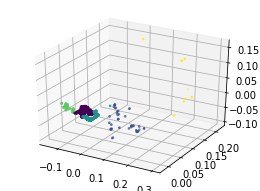

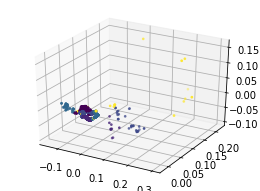

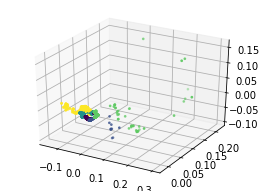

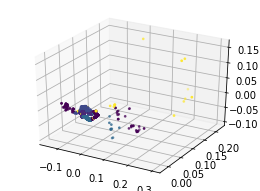

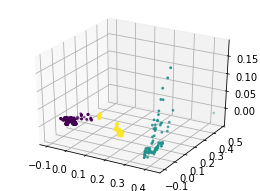

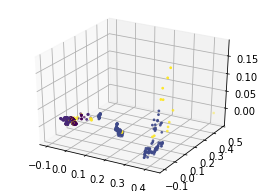

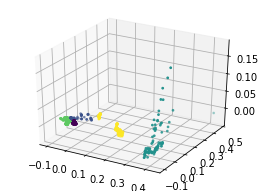

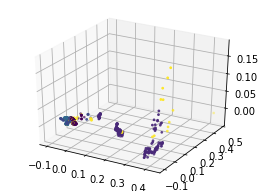

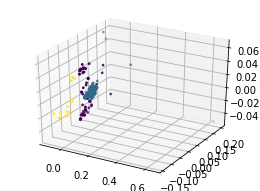

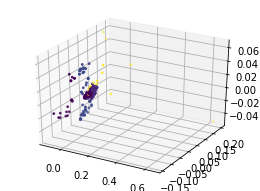

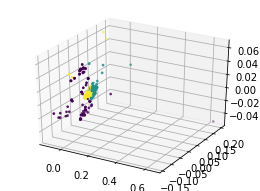

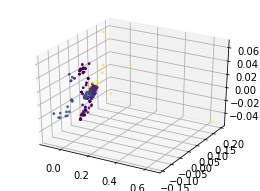

In [ ]:
df_list3 = [achievement7_norm, achievement8_norm, achievement9_norm]
col_list = ['cluster_kmeans', 'cluster_kmeans_except_OL',
            'cluster_KMedoids','cluster_KMedoids_except_OL']

num = 0
for i in range(3) :
  for j in range(4) :
    df = df_list3[i]
    method = col_list[j]
    num += 1
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(4, 3, num, projection='3d')
    ax.scatter(df['comp1'], df['comp2'],df['comp3'],c=df[method], marker='o',s=3)

plt.show()